In [26]:
from definir_coupe import *
from definir_cycle import *
%matplotlib widget 
import matplotlib
import pickle
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
sys.path.append("/home/mehdii/projects/def-vidalthi/mehdii/3DPU_Plateau_Problem/MIP_constraints/Python/")
sys.path.append("/home/mehdii/projects/def-vidalthi/mehdii/3DPU_Plateau_Problem")
from _3DLoops._3dpu_using_dfs import *
import nibabel as nb
ROOT = "../"
from CreatingCycles import *

In [27]:
ROOT = '..'
file_path = '/home/mehdii/projects/def-vidalthi/mehdii/3DPU_Plateau_Problem/Results/ph_loops.pkl'

# Read the pickle file
with open(file_path, "rb") as file:
    data = pickle.load(file)

## Detangle the loops

In [28]:
Cleaning_cycles = Clean_Cycles(data)
Cleaning_cycles.data.create_graph()

100%|██████████| 1939313/1939313 [00:08<00:00, 233171.13it/s]


In [25]:
cycle = data.cycles[np.random.randint(0, len(data.cycles))]
new_graph = Cleaning_cycles.graph_of_residuals(cycle)
Edges = Cleaning_cycles.detangle_new_graph(cycle)
print(cycle)
print(list(new_graph.nodes))
print(Edges)



693119
693096
[93047, 1371032, 686267, 93075, 1377733, 693119, 99045, 699932, 99010, 693096, 93047]
[93047, 1371032, 686267, 93075, 1377733, 693119, 99045, 699932, 99010, 693096]
[(693119, 99045), (693096, 93047)]


100%|██████████| 36/36 [00:00<00:00, 127529.51it/s]


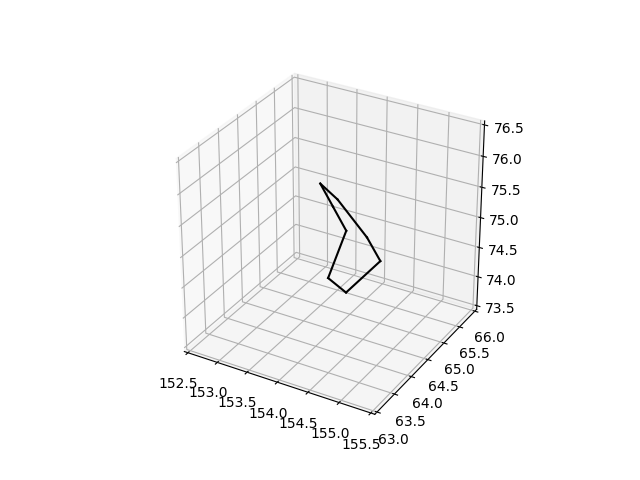

In [110]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_aspect('equal')

X = []
Y = []
Z = []

for edge in new_graph.edges:
    u,v = edge
    a1 = data.mapping[u]
    a2 = data.mapping[v]
    a1 = Ref_cycle.transform_res_to_point(a1)
    a2 = Ref_cycle.transform_res_to_point(a2)
    
    ax.plot([a1[0],a2[0]],[a1[1],a2[1]],[a1[2],a2[2]], c='black')




for square in squares:
    a1,a2,a3,a4,_ = square
    x = (a1[0] + a2[0] + a3[0] + a4[0])/4
    y = (a1[1] + a2[1] + a3[1] + a4[1])/4
    z = (a1[2] + a2[2] + a3[2] + a4[2])/4
    X.append(x)
    Y.append(y)
    Z.append(z)
# ax.plot(X,Y,Z, c='red')


# # for square in squares:
# #     a1,a2,a3,a4,_ = square  
# #     M = [a1[0],a2[0],a3[0],a4[0],a1[0]]
# #     N = [a1[1],a2[1],a3[1],a4[1],a1[1]]
# #     P = [a1[2],a2[2],a3[2],a4[2],a1[2]]
# #     ax.plot(M,N,P, c='blue')

# for edge in Edges_to_remove:
#     a1,a2 = edge
#     a1 = Ref_cycle.transform_res_to_point(a1)
#     a2 = Ref_cycle.transform_res_to_point(a2)
#     ax.plot([a1[0],a2[0]],[a1[1],a2[1]],[a1[2],a2[2]], c='green')



X = np.array(X)
Y = np.array(Y)
Z = np.array(Z)

max_range = np.array([X.max()-X.min(), Y.max()-Y.min(), Z.max()-Z.min()]).max() / 2.0 + 0.5
mid_x = (X.max()+X.min()) * 0.5
mid_y = (Y.max()+Y.min()) * 0.5
mid_z = (Z.max()+Z.min()) * 0.5
ax.set_xlim(mid_x - max_range, mid_x + max_range)
ax.set_ylim(mid_y - max_range, mid_y + max_range)
ax.set_zlim(mid_z - max_range, mid_z + max_range)

plt.show()

In [21]:
graph_of_residuals

{0: [6151, 589424],
 1: [589425],
 2: [1277884],
 3: [1273529],
 4: [584635],
 5: [1277889, 589461, 1277890],
 6: [584662],
 7: [1277891],
 8: [1273530],
 9: [1277892],
 10: [584663],
 11: [589431, 1277893],
 12: [584664],
 13: [584638],
 14: [589434],
 15: [584640],
 16: [1277896],
 17: [584643],
 18: [584645, 584668],
 19: [1277898],
 20: [584670],
 21: [589475],
 22: [1273535],
 23: [1273537],
 24: [6165],
 25: [1273538],
 26: [1273539],
 27: [589481],
 28: [1273540],
 29: [1277902, 1277903],
 30: [1273541],
 31: [589445],
 32: [584676],
 33: [584654],
 34: [6170],
 35: [1277907, 589486],
 36: [1273544],
 37: [1273545],
 38: [589456],
 39: [584660],
 40: [6179],
 41: [584684],
 42: [1277911],
 43: [584686],
 44: [589494],
 45: [584661],
 46: [6181],
 47: [6182],
 48: [6184],
 49: [1273548, 1273549],
 50: [589465, 589498],
 51: [584690],
 52: [584665, 584692],
 53: [589500],
 54: [589471],
 55: [584667],
 56: [589473],
 57: [589474],
 58: [1273553],
 59: [589476, 1277914],
 60: [5846

## Analyse the loops

100%|██████████| 45/45 [00:00<00:00, 144189.21it/s]


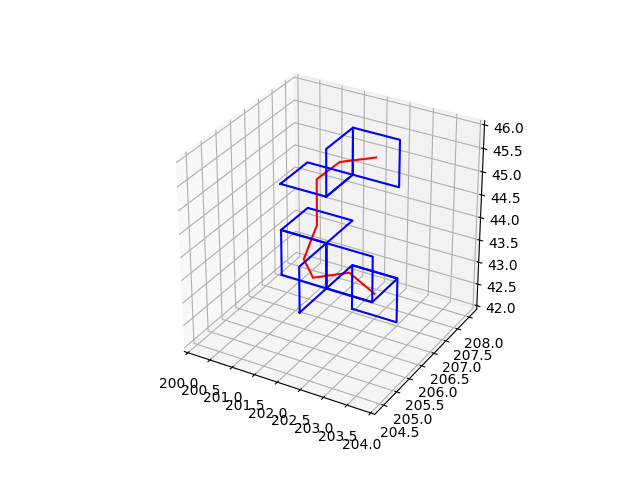

In [76]:
# import networkx as nx

cycle1 = data.open_paths[np.random.randint(0,len(data.open_paths))]
cycle1 = [data.mapping[i] for i in cycle1]
cycle1 = cycle1 + [cycle1[0]]


Ref_cycle = Refine_cycle(cycle1)
squares = Ref_cycle.squares



fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_aspect('equal')

X = []
Y = []
Z = []

graph = nx.Graph()




for square in squares:
    a1,a2,a3,a4,_ = square
    x = (a1[0] + a2[0] + a3[0] + a4[0])/4
    y = (a1[1] + a2[1] + a3[1] + a4[1])/4
    z = (a1[2] + a2[2] + a3[2] + a4[2])/4
    X.append(x)
    Y.append(y)
    Z.append(z)
ax.plot(X,Y,Z, c='red')


for square in squares:
    a1,a2,a3,a4,_ = square  
    M = [a1[0],a2[0],a3[0],a4[0],a1[0]]
    N = [a1[1],a2[1],a3[1],a4[1],a1[1]]
    P = [a1[2],a2[2],a3[2],a4[2],a1[2]]
    ax.plot(M,N,P, c='blue')

# new_graph= creation_one_graph(Ref_cycle,squares)
# All = ((list(nx.connected_components(new_graph))))
# shortest_component = min(nx.connected_components(new_graph), key=len)
# L1,L2,L3,L4 = creation_of_graph(Ref_cycle,squares)
# longest_cycle = max(nx.cycle_basis(new_graph), key=len)

# cycle_graph = get_cycle_graph(cycle1)
# Wrong_nodes = [node for node in new_graph.nodes() if nx.degree(new_graph,node) != 2]

# Bad_nodes = [node for node in cycle_graph.nodes() if nx.degree(cycle_graph,node) != 2]

# print("Number of bad nodes is " + str(len(Bad_nodes)))

# for edge in new_graph.edges:
#     a1,a2 = edge
#     if a1 in shortest_component and a2 in shortest_component:
#         ax.plot([a1[0],a2[0]],[a1[1],a2[1]],[a1[2],a2[2]], c='red')
# colors = ['red','blue','green','yellow','black','purple','orange','pink','brown','grey','cyan','magenta']
# for L in All:
#     for edge in new_graph.edges:
#         a1,a2 = edge
#         color = colors[All.index(L)]
#         if a1 in L and a2 in L:
#             ax.plot([a1[0],a2[0]],[a1[1],a2[1]],[a1[2],a2[2]],c=color)



# Separation_nodes = [node for node in cycle_graph.nodes() if nx.degree(cycle_graph,node) != 2]

# for edge in cycle_graph.edges:
#     res1,res2 = edge
#     a1 = transform_res_to_point(res1)
#     a2 = transform_res_to_point(res2)
#     ax.plot([a1[0],a2[0]],[a1[1],a2[1]],[a1[2],a2[2]], c='green')
# print(len(All))


# old_cycle = nx.Graph()
# edges_cycle = [(cycle1[i],cycle1[(i+1)%len(cycle1)]) for i in range(len(cycle1))]
# old_cycle.add_edges_from(edges_cycle)



# matching_edges = detect_tanglements(cycle1)

# for edge in matching_edges.edges():
#     res1,res2 = edge
    
#     a1 = transform_res_to_point(res1)
#     a2 = transform_res_to_point(res2)
#     if edge in old_cycle.edges:
#         ax.plot([a1[0],a2[0]],[a1[1],a2[1]],[a1[2],a2[2]], c='black')
#     else:
#         ax.plot([a1[0],a2[0]],[a1[1],a2[1]],[a1[2],a2[2]], c='red')

# new_cycle_graph = detect_tanglements(cycle1)

# for edge in new_cycle_graph.edges():
#     res1,res2 = edge
#     a1 = transform_res_to_point(res1)
#     a2 = transform_res_to_point(res2)
#     ax.plot([a1[0],a2[0]],[a1[1],a2[1]],[a1[2],a2[2]], c='red')


X = np.array(X)
Y = np.array(Y)
Z = np.array(Z)

max_range = np.array([X.max()-X.min(), Y.max()-Y.min(), Z.max()-Z.min()]).max() / 2.0 + 0.5
mid_x = (X.max()+X.min()) * 0.5
mid_y = (Y.max()+Y.min()) * 0.5
mid_z = (Z.max()+Z.min()) * 0.5
ax.set_xlim(mid_x - max_range, mid_x + max_range)
ax.set_ylim(mid_y - max_range, mid_y + max_range)
ax.set_zlim(mid_z - max_range, mid_z + max_range)

plt.show()

In [20]:
cycle1

[(76, 92, 0, 0, -1),
 (75, 93, 0, 1, 1),
 (76, 93, 0, 0, 1),
 (76, 94, 0, 1, 1),
 (76, 94, 1, 2, 1),
 (77, 94, 1, 0, 1),
 (77, 94, 1, 2, -1),
 (77, 94, 0, 1, -1),
 (77, 93, 0, 1, -1),
 (77, 92, 0, 1, -1),
 (77, 91, 1, 2, 1),
 (77, 91, 1, 1, -1),
 (78, 90, 1, 0, 1),
 (78, 91, 1, 1, 1),
 (78, 91, 1, 2, -1),
 (78, 92, 0, 1, 1),
 (78, 92, 1, 2, 1),
 (78, 92, 1, 1, -1),
 (79, 91, 1, 0, 1),
 (80, 91, 1, 0, 1),
 (80, 92, 1, 1, 1),
 (80, 92, 1, 0, -1),
 (79, 92, 2, 2, 1),
 (79, 92, 2, 1, -1),
 (79, 91, 2, 2, -1),
 (79, 91, 1, 1, -1),
 (79, 90, 2, 2, 1),
 (79, 91, 2, 1, 1),
 (79, 91, 2, 0, -1),
 (78, 91, 2, 0, -1),
 (77, 91, 2, 2, -1),
 (77, 92, 1, 1, 1),
 (77, 93, 1, 1, 1),
 (77, 93, 1, 0, -1),
 (76, 93, 1, 1, -1),
 (76, 92, 1, 1, -1),
 (76, 91, 1, 2, -1),
 (76, 92, 0, 1, 1),
 (76, 92, 0, 0, -1),
 (76, 92, 0, 0, -1)]

In [25]:
def detect_tanglements(cycle):
    cycle_graph = get_cycle_graph(cycle)
    old_cycle = nx.Graph()
    edges_cycle = [(cycle1[i],cycle1[(i+1)%len(cycle1)]) for i in range(len(cycle1))]
    old_cycle.add_edges_from(edges_cycle)
    Bad_nodes = [node for node in cycle_graph.nodes() if nx.degree(cycle_graph,node) != 2]
    matching_edges = cycle_graph.subgraph(Bad_nodes)
    old_matching_edges = [edge for edge in matching_edges.edges() if edge in old_cycle.edges()]
    new_matching_edges = [edge for edge in matching_edges.edges() if edge not in old_cycle.edges()]
    cycle_graph.remove_edges_from(old_matching_edges)
    cycle_graph.add_edges_from(new_matching_edges)
    return cycle_graph

    

    


In [27]:
matching_edges = detect_tanglements(cycle1)
(matching_edges)

NameError: name 'get_cycle_graph' is not defined

In [28]:
def potential_neighbours(residual, cycle):
    neighbours = []
    i, j, k, axe, value = residual

    # Axe 0
    if axe == 0:
        if value == 1 :
            potential_neighbours = [
                (i + 1, j, k, 0, 1),
                (i, j, k, 1, -1),
                (i, j, k, 2, -1),
                (i, j + 1, k, 1, 1),
                (i, j, k + 1, 2, 1)
            ]
        elif value == -1 and i > 0:
            potential_neighbours = [
                (i - 1, j, k, 0, -1),
                (i - 1, j, k, 1, -1),
                (i - 1, j, k, 2, -1),
                (i - 1, j + 1, k, 1, 1),
                (i - 1, j, k + 1, 2, 1)
            ]

    # Axe 1
    elif axe == 1:
        if value == 1 :
            potential_neighbours = [
                (i, j + 1, k, 1, 1),
                (i, j, k, 0, -1),
                (i, j, k, 2, -1),
                (i + 1, j, k, 0, 1),
                (i, j, k + 1, 2, 1)
            ]
        elif value == -1 and j > 0:
            potential_neighbours = [
                (i, j - 1, k, 1, -1),
                (i, j - 1, k, 0, -1),
                (i, j - 1, k, 2, -1),
                (i + 1, j - 1, k, 0, 1),
                (i, j - 1, k + 1, 2, 1)
            ]

    # Axe 2
    elif axe == 2:
        if value == 1 :
            potential_neighbours = [
                (i, j, k + 1, 2, 1),
                (i, j, k, 0, -1),
                (i, j, k, 1, -1),
                (i + 1, j, k, 0, 1),
                (i, j + 1, k, 1, 1)
            ]
        elif value == -1 and k > 0:
            potential_neighbours = [
                (i, j, k - 1, 2, -1),
                (i, j, k - 1, 0, -1),
                (i, j, k - 1, 1, -1),
                (i + 1, j, k - 1, 0, 1),
                (i, j + 1, k - 1, 1, 1)
            ]

    # Vérifier si chacun des voisins potentiels est dans le cycle
    for pn in potential_neighbours:
        if pn in cycle:
            neighbours.append(pn)

    return neighbours
    
def get_cycle_graph(cycle1):
    Edges = []
    for res in cycle1:
        Neighbours = potential_neighbours(res,cycle1)
        for neighbour in Neighbours:
            Edges.append((res,neighbour))
    cycle_graph = nx.Graph()
    cycle_graph.add_edges_from(Edges)
    return cycle_graph


In [29]:
def transform_res_to_point(res):
    x,y,z,ax,_ = res
    if ax == 0:
        return (x,y+0.5,z+0.5)
    elif ax == 1:
        return (x+0.5,y,z+0.5)
    else:
        return (x+0.5,y+0.5,z)

In [30]:
def edges_of_square(square):
    L = []
    for i in range(4):
        p1 = square[i]
        p2 = square[(i+1)%4]
        if (p1) < (p2):
            L.append((p1,p2))
        else:
            L.append((p2,p1))
    return L
        

def lier_les_edges_common(self,square1,square2):
    edges1 = edges_of_square(square1)
    edges2 = edges_of_square(square2)
    assert len(set(edges1).intersection(set(edges2))) == 1
    common_edge = set(edges1).intersection(set(edges2))
    edges1.remove(list(common_edge)[0])
    edges2.remove(list(common_edge)[0])
    couples = [(list(common_edge)[0],list(common_edge)[0])]
    coupled1 = set(list(common_edge))
    coupled2 = set(list(common_edge))
    for e1 in edges1:
        for e2 in edges2:
            if self.in_same_square_here(e1,e2):
                couples.append((e1,e2))
                coupled1.add(e1)
                coupled2.add(e2)
    assert len(couples) == 3,couples
    left_edge_1 = [e1 for e1 in edges1 if e1 not in coupled1]
    left_edge_2 = [e2 for e2 in edges2 if e2 not in coupled2]
    
    assert len(left_edge_1) == 1
    assert len(left_edge_2) == 1
    couples.append((left_edge_1[0],left_edge_2[0]))
    return couples

def lier_edges_non_common(self,square1,square2):
    edges1 = edges_of_square(square1)
    edges2 = edges_of_square(square2)
    couples = []
    for e1 in edges1:
        for e2 in edges2:
            if self.in_same_square_here(e1,e2):
                couples.append((e1,e2))
    assert len(couples) == 4
    return couples

def lier_edges(self,squares):
    couples = []
    for i in range(len(squares)-1):
        square1 = squares[i]
        square2 = squares[i+1]
        edges1 = edges_of_square(square1)
        edges2 = edges_of_square(square2)
        common_edge = set(edges1).intersection(set(edges2))
        if len(common_edge) == 1:
            new_set_couples = (lier_les_edges_common(self,square1,square2))
        else:
            new_set_couples = (lier_edges_non_common(self,square1,square2))
        couples.append(new_set_couples)
    return couples

def separate_couples(self,couples):
    l1,l2,l3,l4 = couples[0]
    Linked_couples_1 = [l1]
    Linked_couples_2 = [l2]
    Linked_couples_3 = [l3]
    Linked_couples_4 = [l4]
    def ont_intersection_non_vide(set1, set2):
        return not set1.isdisjoint(set2)
    for couple in couples:
        last1,last2,last3,last4 = Linked_couples_1[-1],Linked_couples_2[-1],Linked_couples_3[-1],Linked_couples_4[-1]
        for c in couple:
            if ont_intersection_non_vide(set(c),set(last1)):
                Linked_couples_1.append(c)
            elif ont_intersection_non_vide(set(c),set(last2)):
                Linked_couples_2.append(c)
            elif ont_intersection_non_vide(set(c),set(last3)):
                Linked_couples_3.append(c)
            elif ont_intersection_non_vide(set(c),set(last4)):
                Linked_couples_4.append(c)
    return Linked_couples_1,Linked_couples_2,Linked_couples_3,Linked_couples_4

def creation_one_graph(self,squares):
    couples = lier_edges(self,squares)
    new_graph = nx.Graph()
    C = []
    for couple in couples:
        C += couple
    for couple in C:
        e1,e2 = couple
        p11,p12 = e1
        p21,p22 = e2
        n1 = (np.array(p11) + np.array(p12))/2
        n2 = (np.array(p21) + np.array(p22))/2
        new_graph.add_edge(tuple(n1),tuple(n2))
    return new_graph

def creation_of_graph(self,squares):
    couples = lier_edges(self,squares)
    new_graph1,new_graph2,new_graph3,new_graph4 = nx.Graph(),nx.Graph(),nx.Graph(),nx.Graph()
    L1,L2,L3,L4 = separate_couples(self,couples)
    for couple in L1:
        e1,e2 = couple
        p11,p12 = e1
        p21,p22 = e2
        n1 = (np.array(p11) + np.array(p12))/2
        n2 = (np.array(p21) + np.array(p22))/2
        new_graph1.add_edge(tuple(n1),tuple(n2))
    for couple in L2:
        e1,e2 = couple
        p11,p12 = e1
        p21,p22 = e2
        n1 = (np.array(p11) + np.array(p12))/2
        n2 = (np.array(p21) + np.array(p22))/2
        new_graph2.add_edge(tuple(n1),tuple(n2))
    for couple in L3:
        e1,e2 = couple
        p11,p12 = e1
        p21,p22 = e2
        n1 = (np.array(p11) + np.array(p12))/2
        n2 = (np.array(p21) + np.array(p22))/2
        new_graph3.add_edge(tuple(n1),tuple(n2))
    for couple in L4:
        e1,e2 = couple
        p11,p12 = e1
        p21,p22 = e2
        n1 = (np.array(p11) + np.array(p12))/2
        n2 = (np.array(p21) + np.array(p22))/2
        new_graph4.add_edge(tuple(n1),tuple(n2))
    return new_graph1,new_graph2,new_graph3,new_graph4


(((185, 193, 17), (185, 194, 17)), ((185, 193, 17), (185, 194, 17)))

In [310]:
l1,l2,l3,l4 = couples[0]
Linked_couples_1 = [l1]
Linked_couples_2 = [l2]
Linked_couples_3 = [l3]
Linked_couples_4 = [l4]
def ont_intersection_non_vide(set1, set2):
    return not set1.isdisjoint(set2)
for couple in couples:
    c1,c2,c3,c4 = couple
    last1,last2,last3,last4 = Linked_couples_1[-1],Linked_couples_2[-1],Linked_couples_3[-1],Linked_couples_4[-1]
    for c in couple:
        if ont_intersection_non_vide(set(c),set(last1)):
            Linked_couples_1.append(c)
        elif ont_intersection_non_vide(set(c),set(last2)):
            Linked_couples_2.append(c)
        elif ont_intersection_non_vide(set(c),set(last3)):
            Linked_couples_3.append(c)
        elif ont_intersection_non_vide(set(c),set(last4)):
            Linked_couples_4.append(c)





In [312]:
len(set(Linked_couples_1)),len(set(Linked_couples_2)),len(set(Linked_couples_3)),len(set(Linked_couples_4)) 

(8, 10, 10, 9)